# Implement SGD for binary classification by using logistic model
- Your Name: 王昊霖
- Your ID:2020141440041

# import necessary modules

* numpy for matrix calculation, `pip install numpy`
* matplotlib for plot figures, `pip install matplotlib`

In [83]:
import numpy as np
from matplotlib import pyplot as plt

# prepare dataset D


1. load data `x` and `y` from the file `x.npy` and `y.npy`, respectively
2. adding bias term `1` to `x`


In [84]:
x = np.load("H5-x.npy")
print("original shape of x:{}".format(x.shape))
max_index = np.argmax(x,axis=1) # 取每一行的最大值
min_index =np.argmin(x,axis=1) # 取每一行的最小值
"""归一化"""
for  i in range(x.shape[0]):
    d= x[i][max_index[i]]-x[i][min_index[i]]
    for j in range(x.shape[1]):
        x[i][j]=(x[i][j]-x[i][min_index[i]])/d  
x = np.concatenate([x, np.ones((1,x.shape[1]))])
x= np.double(x)
print("new shape of x:{}".format(x.shape))
 
y = np.load("H5-y.npy")
print("new shape of y:{}".format(y.shape))

original shape of x:(30, 569)
new shape of x:(31, 569)
new shape of y:(1, 569)


# implement the function below for logistic model

$a = \sigma (wx)$, where

- $x \in R^{31\times n}$
- $w \in R^{1\times 31}$
- $\sigma (z) = \frac{1}{1+e^{-z}}$

In [85]:
def sigmoid(z):
    #### Your code here ###
    return 1.0/(np.exp(-z)+1)
def logisticModel(w, x):
    #### Your code here ####
    a = w@x
    ########################
    return sigmoid(a)
w = np.random.normal(size =(1,31))
a= logisticModel(w,x)
print(a.shape)
for a_i,y_i in zip(a[0][0:10],y[0]):
    print(a_i,y_i)

(1, 569)
0.37659499047748657 0
0.3627418514596711 0
0.34197564738749975 0
0.6069492403933734 0
0.19097243122725435 0
0.47808140834502816 0
0.4860642341812331 0
0.49287176907237 0
0.5410777833893257 0
0.5050990506956159 0


# define cost function and accuracy


$J= \frac{1}{m}\sum_{i=1}^{m}{\left[y^{i}\cdot \log(a^{i})+(1-y^{i})\cdot \log(1-a^{i})\right]}$

$\frac{\partial J}{\partial w} = \frac{1}{m}(a-y)x^{T}$


In [86]:
def cost(a, y):
    #### Your code here ####
    J =-sum([y_i*np.log(a_i)+(1-y_i)*np.log(1-a_i) for y_i,a_i in zip(y[0],a[0])])
    ########################
    return J/len(y[0])
print(cost(a,y).shape,len(y[0]))

def grad(a, x, y):
    #### Your code here ####
    grad_w = (a-y)@x.T
    ########################
    return grad_w/len(y[0])

def accuarcy(a, y, tao=0.5):
    #### Your code here ####
    acc = 0
    for a_i,y_i in zip(a[0],y[0]):
        if a_i>=tao and y_i:
            acc+=1
        elif a_i<tao and not y_i:
            acc+=1
    ########################
    return acc/x.shape[1]

grad(a,x,y).shape

() 569


(1, 31)

# gradient descent algorithm

----------------------------------------
gradient descent method: w=[[ 0.68350956 -0.78379866 -1.4459833  -2.00691342  0.3714852   0.12194567
  -2.57418613 -3.703093   -0.31907859  1.71032033 -1.22240912  0.60412792
   0.39588152 -1.19445827 -1.10005633  0.26304963 -0.2605941  -0.72855919
   2.63422849  0.9668431  -0.36421713 -0.88459438 -0.93426046 -0.93657638
   0.62198919 -3.06809039 -1.53804513 -3.94848088  0.35588329  2.58802275
   3.73942418]]
----------------------------------------


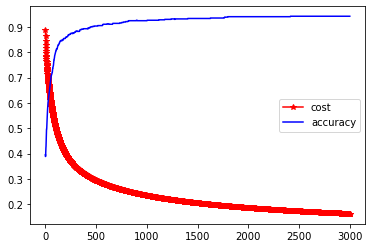

In [87]:

alpha = 0.1
Js = []
accs = []

# please test different K  
K = 3000

for i in range(K):
    a = logisticModel(w, x)
    grad_w = grad(a, x, y)
    w = w - alpha * grad_w
    Js.append(cost(a, y))
    accs.append(accuarcy(a, y))

plt.plot(Js,'r-*',label="cost")
plt.plot(accs,'b-',label="accuracy")
plt.legend()
plt.savefig("cost.jpg")
print("-"*40)
print("gradient descent method: w={}".format(w))
print("-"*40)   

In [88]:
accuarcy(logisticModel(w, x),y)

0.9420035149384886